In [1]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sn
import pylte
%matplotlib inline

In [2]:
atmos = np.loadtxt('hsra.model', skiprows=2)
lines = np.loadtxt('lines.dat')

/usr/pkg/python/Python-2.7.6/lib/python2.7/site-packages/matplotlib-1.4.3-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


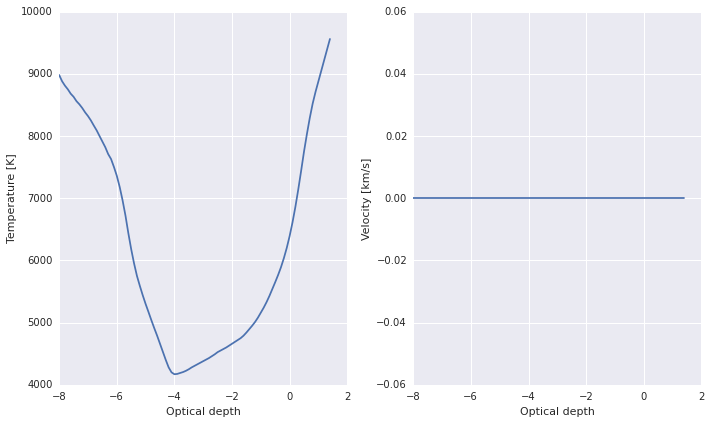

In [3]:
f, ax = pl.subplots(nrows=1, ncols=2, figsize=(10,6))
ax[0].plot(atmos[:,0],atmos[:,1])
ax[1].plot(atmos[:,0],atmos[:,2])
ax[0].set_xlabel('Optical depth')
ax[0].set_ylabel('Temperature [K]')
ax[1].set_xlabel('Optical depth')
ax[1].set_ylabel('Velocity [km/s]')
pl.tight_layout()

In [4]:
wl = np.linspace(6301.0,6303.0,100)
pylte.initAtmos(atmos)
pylte.initLines(lines, wl)

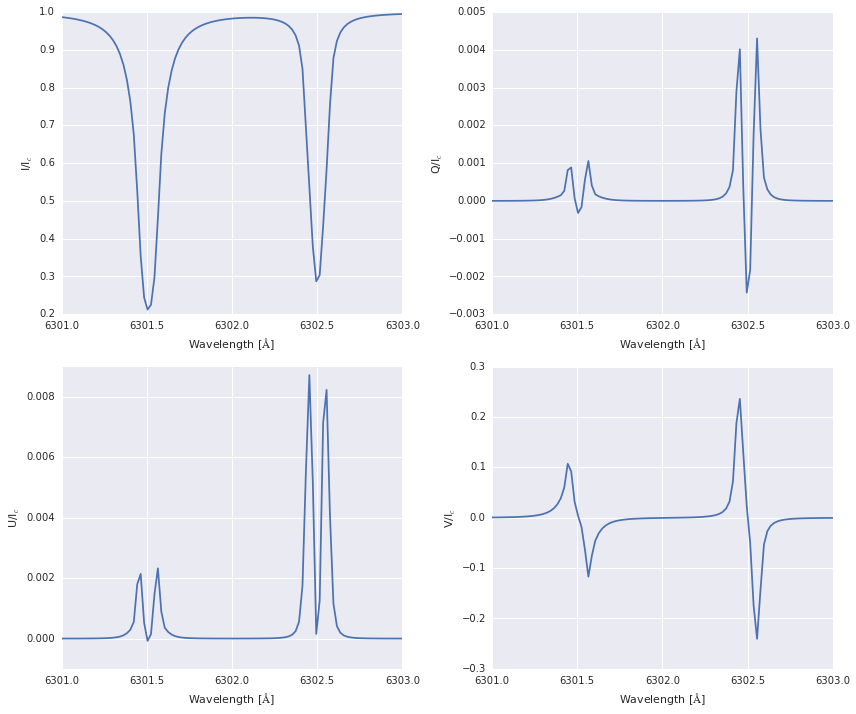

In [5]:
out, continuum = pylte.synthLines(atmos)
f, ax = pl.subplots(ncols=2, nrows=2, figsize=(12,10))
labels = ['I/I$_c$','Q/I$_c$','U/I$_c$','V/I$_c$']
loop = 0
for i in range(2):
    for j in range(2):
        ax[i,j].plot(wl, out[loop,:] / continuum)
        ax[i,j].set_xlabel('Wavelength [$\AA$]')
        ax[i,j].set_ylabel(labels[loop])
        ax[i,j].ticklabel_format(useOffset=False)
        loop += 1
pl.tight_layout()

In [6]:
print lines

[[  6.30150910e+03   2.60000000e+01   1.00000000e+00  -5.90000000e-01
    2.94690220e+04   1.50000000e+00   1.83300000e+00   2.00000000e+00
    2.00000000e+00   8.32345000e+02   2.43000000e-01]
 [  6.30250170e+03   2.60000000e+01   1.00000000e+00  -1.16000000e+00
    2.97327340e+04   3.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   8.47735000e+02   2.40000000e-01]]


In [8]:
lines[0,3] = -0.50

In [9]:
pylte.initLines(lines, wl)
outNew, continuumNew = pylte.synthLines(atmos)

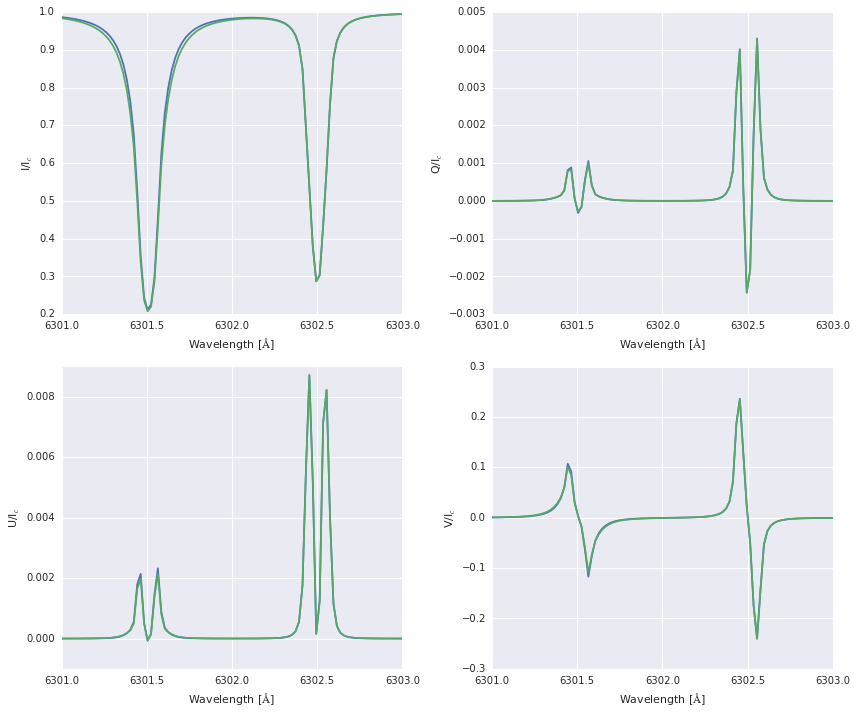

In [10]:
f, ax = pl.subplots(ncols=2, nrows=2, figsize=(12,10))
labels = ['I/I$_c$','Q/I$_c$','U/I$_c$','V/I$_c$']
loop = 0
for i in range(2):
    for j in range(2):
        ax[i,j].plot(wl, out[loop,:] / continuum)
        ax[i,j].plot(wl, outNew[loop,:] / continuumNew)
        ax[i,j].set_xlabel('Wavelength [$\AA$]')
        ax[i,j].set_ylabel(labels[loop])
        ax[i,j].ticklabel_format(useOffset=False)
        loop += 1
pl.tight_layout()